<a href="https://colab.research.google.com/github/utk468/flower_classification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
marquis03_flower_classification_path = kagglehub.dataset_download('marquis03/flower-classification')

print('Data source import complete.')


In [ ]:
import kagglehub


path = kagglehub.dataset_download("marquis03/flower-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flower-classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Model
import os

In [ ]:

train_dir = "/kaggle/input/flower-classification/train"
val_dir = "/kaggle/input/flower-classification/val"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)


val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(14, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


loss, accuracy = model.evaluate(val_generator)
print(f"Val Accuracy: {accuracy:.2f}")

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 180s 282ms/step - accuracy: 0.9774 - loss: 0.0665 - val_accuracy: 0.9796 - val_loss: 0.1603
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 88s 202ms/step - accuracy: 0.9796 - loss: 0.0577 - val_accuracy: 0.9694 - val_loss: 0.1737
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 88s 202ms/step - accuracy: 0.9802 - loss: 0.0618 - val_accuracy: 0.9694 - val_loss: 0.1739
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 87s 201ms/step - accuracy: 0.9853 - loss: 0.0499 - val_accuracy: 0.9694 - val_loss: 0.1949
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 88s 203ms/step - accuracy: 0.9820 - loss: 0.0525 - val_accuracy: 0.9796 - val_loss: 0.1336
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 88s 202ms/step - accuracy: 0.9865 - loss: 0.0439 - val_accuracy: 0.9694 - val_loss: 0.1609
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 87s 200ms/step - accuracy: 0.9843 - loss: 0.0450 - val_accuracy: 0.9490 - val_loss: 0.1985
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 89s 206ms/step - accuracy: 0.9885 - loss: 

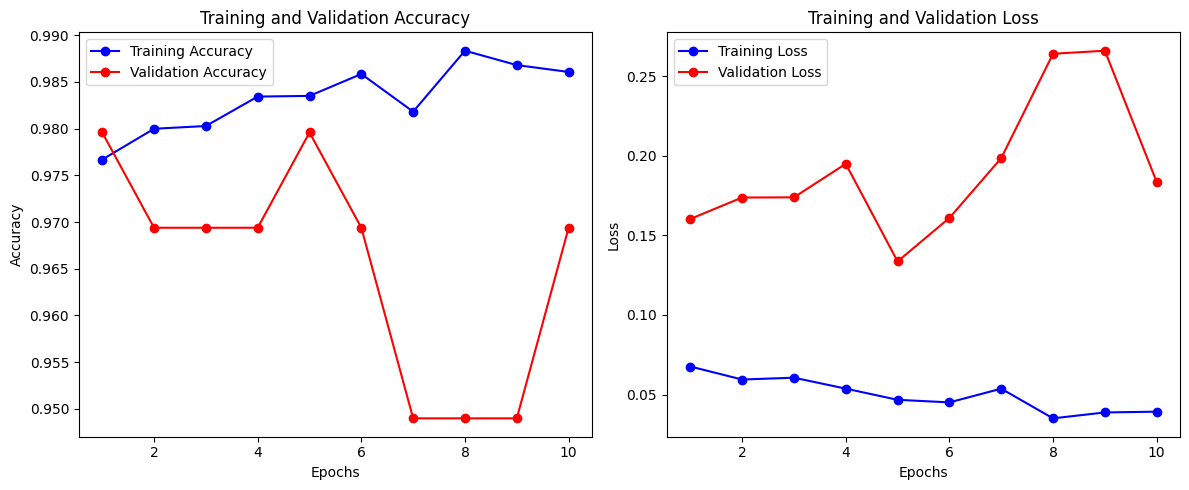

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()